<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0303_Thurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# normalization
train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


# Functional API 사용

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs) # 필터의 개수, 필터의 shape, 활성함수
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2) 

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3) # Dense layer에 넣기 위해 flatten

# Dropout 적용
dense4 = Dense(64, activation='relu')(flat)
drop4 = Dropout(rate=0.2)(dense4) # 정규화 20% 비율로 스킵, 뉴런을 임의로 삭제하면서 학습
outputs = Dense(10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

# ModelCheckpoint - 중간에 모델 저장
# EarlyStopping - 모델 성능이 더이상 향상되지 않으면 정지

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/딥러닝 NLP/models/'
model_path = f"{MODEL_SAVE_FOLDER}mmist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy',
                                save_weights_only=True,
                                verbose=1,
                                save_best_only=True)
cb_early_stopping= EarlyStopping(monitor='val_accuracy',patience=6) # did not imporoved가 연속으로 6번 나오면 학습 stop

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping]) # callbacks 는 내가 부르는게 아니고 시스템에서 부르는거(내가 정의해두긴함)

Epoch 1/100
297/300 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9951
Epoch 1: val_accuracy improved from -inf to 0.99224, saving model to /content/drive/MyDrive/딥러닝 NLP/models/mmist-1-0.02966-0.99224.hdf5
300/300 [==============================] - 6s 16ms/step - loss: 0.0138 - accuracy: 0.9951 - val_loss: 0.0297 - val_accuracy: 0.9922
Epoch 2/100
300/300 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964
Epoch 2: val_accuracy did not improve from 0.99224
300/300 [==============================] - 4s 14ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0375 - val_accuracy: 0.9906
Epoch 3/100
299/300 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9963
Epoch 3: val_accuracy improved from 0.99224 to 0.99282, saving model to /content/drive/MyDrive/딥러닝 NLP/models/mmist-3-0.02908-0.99282.hdf5
300/300 [==============================] - 4s 14ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0291 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper roght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


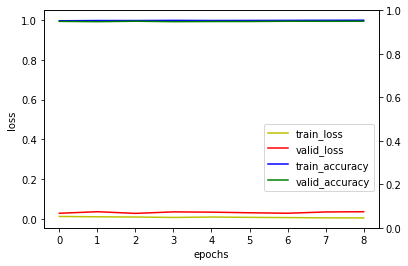

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

loss_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
loss_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper roght', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
!ls -la models

total 2752
drwxr-xr-x 2 root root   4096 Mar  3 01:36 .
drwxr-xr-x 1 root root   4096 Mar  3 01:18 ..
-rw-r--r-- 1 root root 400264 Mar  3 01:36 mmist-10-0.02655-0.99200.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:35 mmist-1-0.06942-0.97988.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:36 mmist-13-0.02808-0.99247.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:36 mmist-14-0.02939-0.99306.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:35 mmist-2-0.04619-0.98424.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:35 mmist-3-0.03493-0.98965.hdf5
-rw-r--r-- 1 root root 400264 Mar  3 01:35 mmist-4-0.03209-0.99129.hdf5


In [ ]:
saved_path = '/content/drive/MyDrive/딥러닝 NLP/models/mmist-3-0.02908-0.99282.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 9s 4ms/step - loss: 0.0378 - accuracy: 0.9913
Loss, Accuracy [0.03775019198656082, 0.9913333058357239]


In [ ]:
!rm '/content/drive/MyDrive/딥러닝 NLP/models/'*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPool2D()
        self.conv2 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPool2D()
        self.conv3 = Conv2D(64, (3, 3), activation='relu')
        self.flat = Flatten()
        self.dense4 = Dense(64, activation='relu')
        self.drop = Dropout(0.2)
        self.outputs = Dense(10, activation='softmax')

    #Forward 
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.flat(net)
        net = self.dense4(net)
        net = self.drop(net)
        net = self.outputs(net)

        return net

model = MNISTModel()
inputs = Input(shape=(28, 28, 1))
model(inputs)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           multiple                  36928     
                                                                 
 flatten (Flatten)           multiple                  

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER = '/content/drive/MyDrive/딥러닝 NLP/models/'
model_path = f"{MODEL_SAVE_FOLDER}mmist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, 
                                monitor='val_accuracy',
                                save_weights_only=True,
                                verbose=1,
                                save_best_only=True)
cb_early_stopping= EarlyStopping(monitor='val_accuracy',patience=6)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

Epoch 1/100
297/300 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8856
Epoch 1: val_accuracy improved from -inf to 0.97847, saving model to /content/drive/MyDrive/딥러닝 NLP/models/mmist-1-0.06941-0.97847.hdf5
300/300 [==============================] - 4s 8ms/step - loss: 0.3782 - accuracy: 0.8863 - val_loss: 0.0694 - val_accuracy: 0.9785
Epoch 2/100
295/300 [============================>.] - ETA: 0s - loss: 0.0984 - accuracy: 0.9705
Epoch 2: val_accuracy improved from 0.97847 to 0.98506, saving model to /content/drive/MyDrive/딥러닝 NLP/models/mmist-2-0.04657-0.98506.hdf5
300/300 [==============================] - 2s 6ms/step - loss: 0.0978 - accuracy: 0.9707 - val_loss: 0.0466 - val_accuracy: 0.9851
Epoch 3/100
297/300 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9798
Epoch 3: val_accuracy improved from 0.98506 to 0.98753, saving model to /content/drive/MyDrive/딥러닝 NLP/models/mmist-3-0.04129-0.98753.hdf5
300/300 [=========

In [ ]:
saved_path = '/content/drive/MyDrive/딥러닝 NLP/models/mmist-20-0.02262-0.99424.hdf5'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(saved_path)

print(f"Loss, Accuracy {model.evaluate(test_images, test_labels)}")

47/47 [==============================] - 9s 6ms/step - loss: 0.0126 - accuracy: 0.9973
Loss, Accuracy [0.01257546991109848, 0.9973333477973938]


In [ ]:
output = model(test_images)
output.shape

TensorShape([1500, 10])

In [ ]:
import numpy as np
output[0] # softmax를 거친 값
np.argmax(output[0])

5

In [ ]:
test_labels[0]

5